## Visualizing crime types in Chicago

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
from bokeh.io import show, output_notebook, output_file
from bokeh.models import (
    GeoJSONDataSource,
    HoverTool,
    LinearColorMapper,
    ColumnDataSource
)
from bokeh.plotting import figure

mpl.rcParams['figure.figsize'] = (16,8)
mpl.style.use('ggplot')

In [2]:
df = pd.read_csv("../data/crimes.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1543,806628,7987372,HT218855,03/24/2011 04:15:00 PM,051XX S WENTWORTH AVE,0810,THEFT,OVER $500,POLICE FACILITY/VEH PARKING LOT,False,...,3.0,37.0,06,1175826.0,1871120.0,2011,06/01/2016 03:51:23 PM,41.801719,-87.630704,"(41.80171934, -87.630703621)"
1556,807383,7636232,HS440543,08/01/2010 02:34:00 PM,043XX W GRAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,31.0,23.0,08B,1146923.0,1910302.0,2010,06/02/2016 03:51:36 PM,41.909839,-87.735703,"(41.909839206, -87.735702897)"
9396,822929,7298920,HS102810,01/03/2010 03:57:00 AM,029XX W FIFTH AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,2.0,27.0,08A,1156622.0,1899476.0,2010,02/04/2016 06:33:39 AM,41.879941,-87.700366,"(41.879940711, -87.70036601)"
9439,822997,7308363,HS112863,01/09/2010 08:30:00 PM,056XX N KEDVALE AVE,0560,ASSAULT,SIMPLE,STREET,False,...,39.0,13.0,08A,1147715.0,1937069.0,2010,02/04/2016 06:33:39 AM,41.983275,-87.732104,"(41.98327489, -87.732103645)"
9450,823014,7312036,HS116407,01/12/2010 11:25:00 AM,067XX S GREEN ST,0810,THEFT,OVER $500,STREET,False,...,6.0,68.0,06,1171798.0,1860169.0,2010,02/04/2016 06:33:39 AM,41.771758,-87.645797,"(41.771757969, -87.645796948)"


Next we turn the crime types into categorical data and plot the results

In [6]:
df["Primary Type"] = df["Primary Type"].astype('category')
df["Primary Type"].unique()

[THEFT, BATTERY, ASSAULT, NARCOTICS, ARSON, ..., NON-CRIMINAL, HUMAN TRAFFICKING, CONCEALED CARRY LICENSE VIOLATION, NON - CRIMINAL, NON-CRIMINAL (SUBJECT SPECIFIED)]
Length: 33
Categories (33, object): [THEFT, BATTERY, ASSAULT, NARCOTICS, ..., HUMAN TRAFFICKING, CONCEALED CARRY LICENSE VIOLATION, NON - CRIMINAL, NON-CRIMINAL (SUBJECT SPECIFIED)]

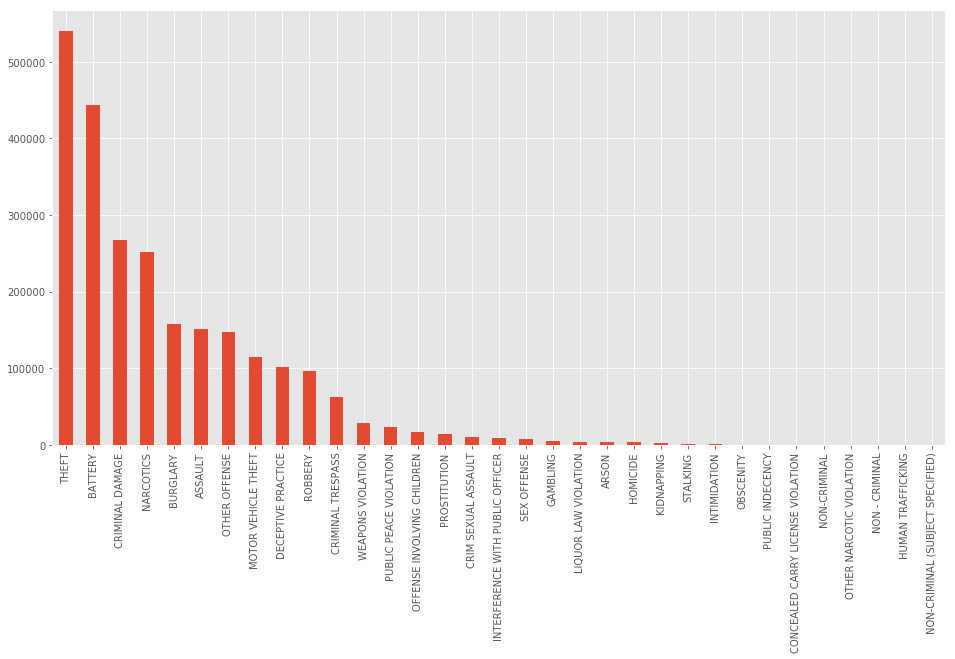

In [23]:
crime_type_dist = df["Primary Type"].value_counts()
crime_type_dist.plot(kind="bar")

It's quite clear that in our dataset, most of the crimes involve 
either violence, some kind of targeting to others property or 
drug usage.

Next lets see what are the top 10 locations where most of the crimes are made

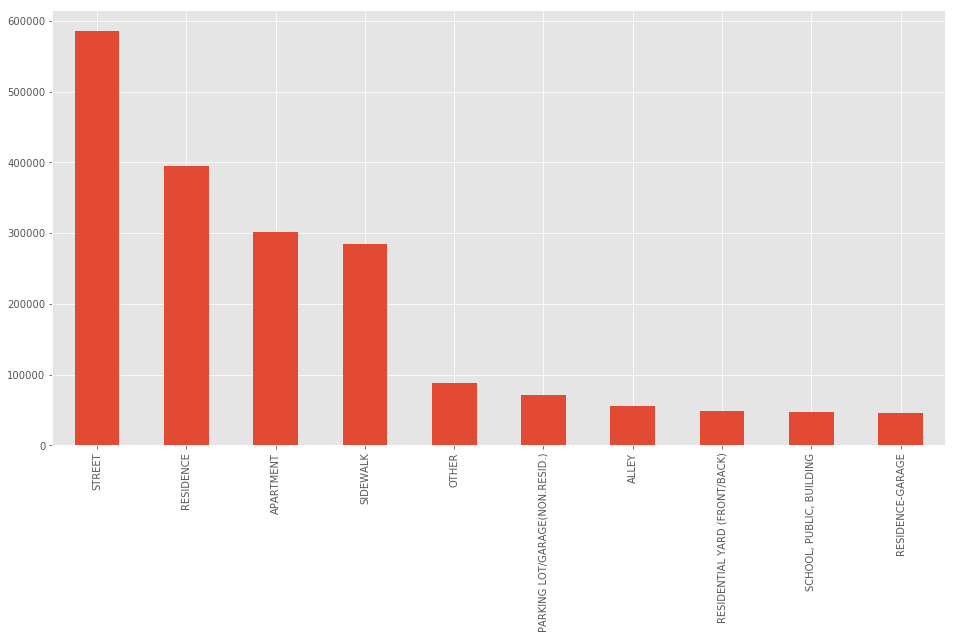

In [24]:
df["Location Description"].value_counts().head(10).plot(kind="bar")